# Dataset Details

Period: 2019–2023 (Hourly data)
Total clean hours originally: ~43,800

# Contains real-world problems:

✔ Missing 200 random hours
✔ 100 duplicate timestamps
✔ 30 extreme outliers (4× spikes)
✔ 150 NaN values
✔ Shuffled rows (not time ordered)
✔ Daily seasonality
✔ Yearly seasonality
✔ Upward long-term trend
✔ Random noise

# Cleaning Task

We should:

Convert timestamp to datetime

Sort chronologically

Remove duplicates

Set timestamp as index

Recreate full hourly range (asfreq('h'))

Handle missing timestamps

Handle NaN values (interpolation)

Detect & treat outliers

Confirm frequency using pd.infer_freq()

Save cleaned dataset

# Time Series Data Cleaning Project – Electricity Demand (5 Years Hourly Data)

As part of strengthening my forecasting skills, I worked on a real-world simulation project involving 5 years of hourly electricity demand data.

# The dataset contained:

Missing timestamps

Duplicate records

Extreme outliers

NaN values

Broken chronological order

# Using Python & Pandas, I performed:

Datetime conversion & frequency validation

Duplicate detection & removal

Missing hour reconstruction

Interpolation of missing values

Outlier detection using statistical methods

Feature engineering (lag, rolling mean)

# The cleaned dataset is now ready for ARIMA / SARIMA modeling.

# This project helped me understand that data preparation is 70% of time series forecasting.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Step-01: Load data



In [8]:
df = pd.read_csv('electricity_demand_5year_raw.csv')

In [9]:
# Read first 5 row

df.head()

,Date,electricity_demand
0,08-06-2019 17:00,197.300859
1,10-04-2021 05:00,255.255627
2,27-07-2019 18:00,174.827846
3,05-01-2022 17:00,188.051653
4,03-06-2023 04:00,254.868078


# Step-02: Convert date-column to datetime



In [10]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst =True)

In [29]:
# Again check first 5 row data and see difference
df.head()

,Date,electricity_demand
0,2019-06-08 17:00:00,197.300859
1,2021-04-10 05:00:00,255.255627
2,2019-07-27 18:00:00,174.827846
3,2022-01-05 17:00:00,188.051653
4,2023-06-03 04:00:00,254.868078


# Step-03: Sort by Date (VERY IMPORTANT)

In [11]:
df = df.sort_values('Date')

In [12]:
# Again check first 5 rows values
df.head()

,Date,electricity_demand
16365,2019-01-01 00:00:00,205.225342
28762,2019-01-01 01:00:00,204.052623
6491,2019-01-01 02:00:00,216.736455
29309,2019-01-01 03:00:00,229.632688
15145,2019-01-01 04:00:00,215.239913


# Step-04: Set index

In [13]:
df = df.set_index('Date')   # After this step Date column be our index column too.

In [14]:
# Again check 5 rows

df.head()

,electricity_demand
Date,
2019-01-01 00:00:00,205.225342
2019-01-01 01:00:00,204.052623
2019-01-01 02:00:00,216.736455
2019-01-01 03:00:00,229.632688
2019-01-01 04:00:00,215.239913


# Step-05: Check Frequency (Hourly or Not?)

In [15]:
print(df.index.inferred_freq)  # If returns None, set Frequency manually. and use df = df.asfreq('H')

None


# Step-06 Handle Missing Values

In [16]:
df.isna().sum()    # We found 151 Missing values in data

electricity_demand    151
dtype: int64

In [ ]:
# Remove Missing Values

In [17]:
df['electricity_demand'] = df['electricity_demand'].interpolate()

In [96]:
# Check again as we do before, missing values

In [18]:
df.isna().sum()   # Now we have Zero missing values

electricity_demand    0
dtype: int64

# Step-07: Basic EDA

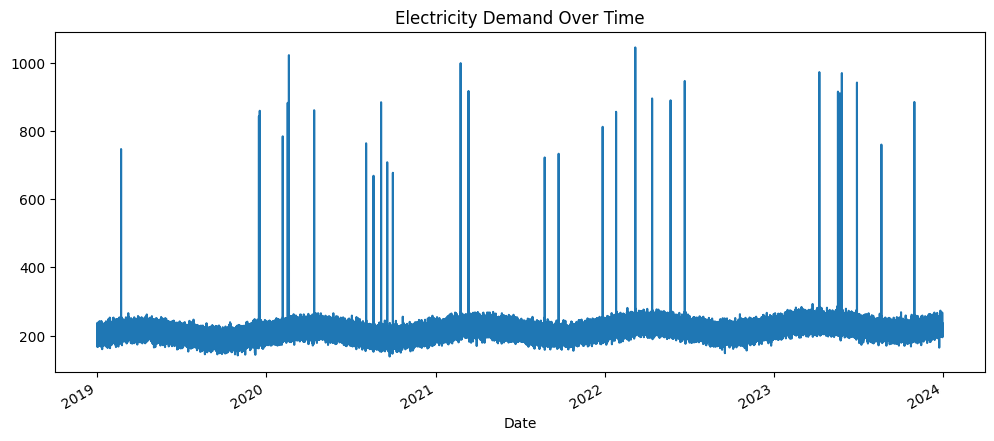

In [19]:
df['electricity_demand'].plot(figsize=(12,5))
plt.title('Electricity Demand Over Time')
plt.show()

In [99]:
# Check the last one month' graph

C:\Users\Admin\AppData\Local\Temp\ipykernel_21064\2425279702.py:1: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  df['electricity_demand'].last('1M').plot(figsize=(12,5))
C:\Users\Admin\AppData\Local\Temp\ipykernel_21064\2425279702.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['electricity_demand'].last('1M').plot(figsize=(12,5))


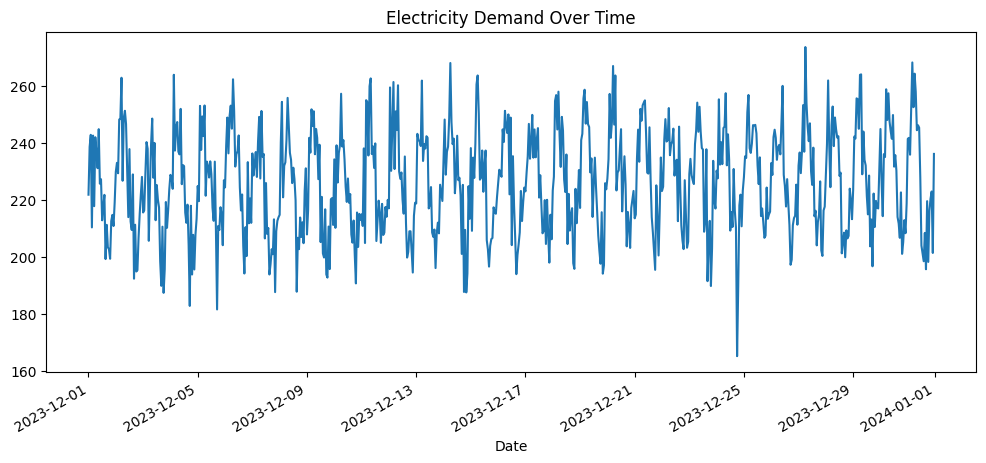

In [21]:
df['electricity_demand'].last('1M').plot(figsize=(12,5))
plt.title('Electricity Demand Over Time')
plt.show()

In [22]:
print(type(df.index))   # just checked, is date column is datetimeindex or not, if it was not than we can see above one month graph

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


# Step-08: Check daily seasonality

Check seasonality - Hour, Daily of Week, Month, Season

In [23]:
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['year'] = df.index.year

# Hourly Pattern 

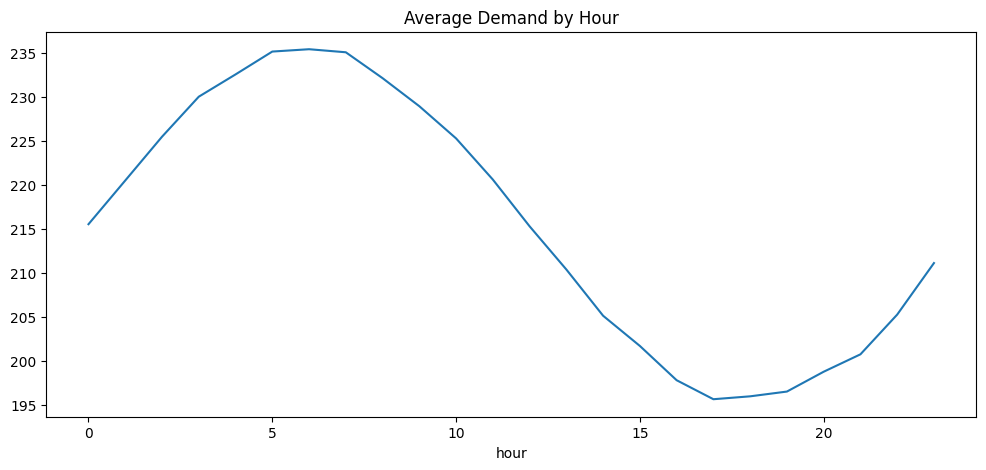

In [25]:
df.groupby('hour')['electricity_demand'].mean().plot(figsize=(12,5))
plt.title("Average Demand by Hour")
plt.show()

# Weekly Pattern

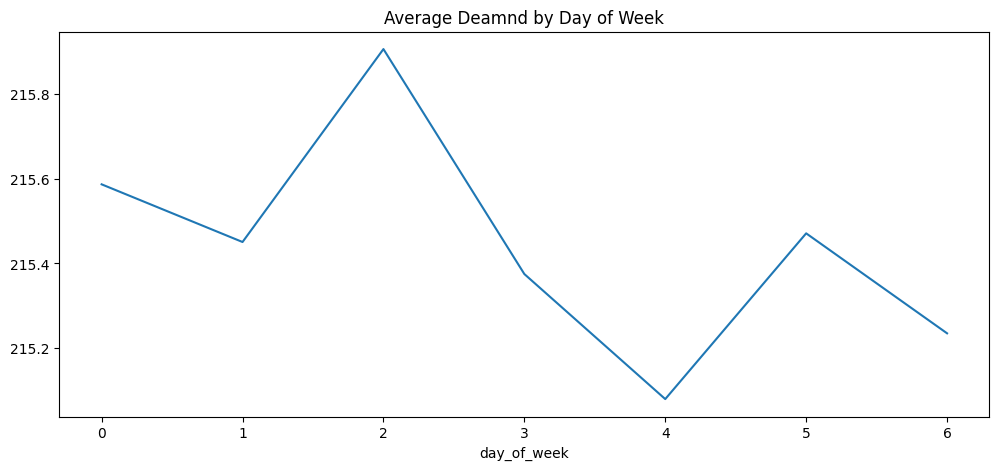

In [27]:
df.groupby('day_of_week')['electricity_demand'].mean().plot(figsize=(12,5))
plt.title('Average Deamnd by Day of Week')
plt.show()

# Yearly Pattern

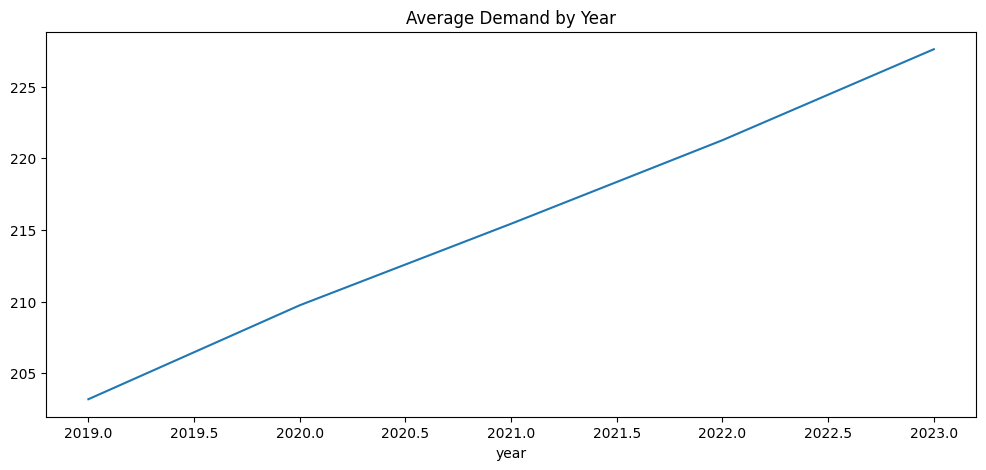

In [28]:
df.groupby('year')['electricity_demand'].mean().plot(figsize=(12,5))
plt.title("Average Demand by Year")
plt.show()

# Monthly Pattern

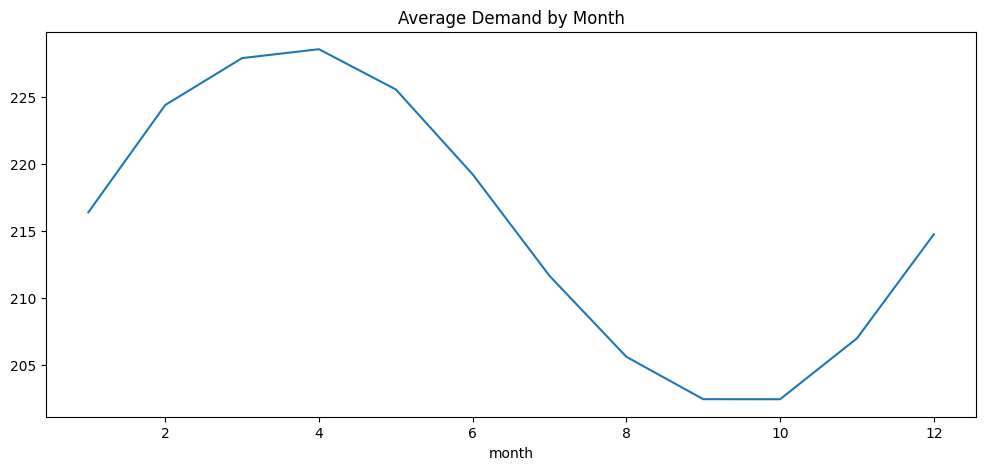

In [30]:
df.groupby('month')['electricity_demand'].mean().plot(figsize=(12,5))
plt.title("Average Demand by Month")
plt.show()

In [31]:
df.index.duplicated().sum()   # checking duplicate dates, 100 Duplicate dates

np.int64(100)

# Removed duplicate dates

In [33]:
df = df[~df.index.duplicated()]

In [ ]:
# check again the sum of duplicate dates

In [35]:
df.index.duplicated().sum()     # Now zero duplicate dates

np.int64(0)

# Step-09: Train - Test Split 
Because electricity has Daily seaspnality (24 Hours) and weekly seasonality (168 hours)
hourly data, better split by time

Train -> 2019-2022
Test ->  2023

In [42]:
train = df[:'2022-12-31']

In [43]:
test = df['2023-01-01':]

# Step-10: Check Stationarity

In [48]:
from statsmodels.tsa.stattools import adfuller  # This performs the Augmented Dickey-Fuller (ADF) test, which checks whether your time series is stationary.
result = adfuller(train['electricity_demand'])
print("p-value:", result[1])  # result[1] p-value

p-value: 1.4556007476399051e-05


# we got very good p value, that is 0.000014556
If p-value < 0.05 → Reject H0 → Series is stationary
If p-value > 0.05 → Fail to reject H0 → Not stationary

Our Result 
0.000014 < 0.05

Reject Null Hypothesis
Our electricity demand series is statistically stationary

# What is Stationarity?

A time series is stationary if:

Mean is constant over time

Variance is constant

No long-term trend

What adfuller() Returns

adfuller() returns multiple values inside a tuple:

result[0] → Test statistic  
result[1] → p-value  
result[2] → Number of lags used  
result[3] → Number of observations  
result[4] → Critical values

In [49]:
from statsmodels.tsa.stattools import adfuller  
result = adfuller(train['electricity_demand'])
print("Number of lags used:", result[2])   # here Number of lags is used 52

p-value: 52


In [50]:
from statsmodels.tsa.stattools import adfuller  
result = adfuller(train['electricity_demand'])
print("Number of observations:", result[3]) # Number of observations

p-value: 34843


# Step-11: Apply SARIMA (Better for Electricity)

In [51]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [52]:
model = SARIMAX(train['electricity_demand'],
                order=(1,1,1),
                seasonal_order=(1,1,1,24))  # 24 for daily seasonality

model_fit = model.fit()

forecast = model_fit.forecast(steps=len(test))

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_predict

# statsmodels → statistical modeling library

tsa → time series analysis

statespace → advanced framework for time series

SARIMAX → Seasonal ARIMA with optional exogenous variables

SARIMAX = ARIMA + Seasonality + Extra Variables (optional)

Our Target Variable = train['electricity_demand']
This is the non-seasonal ARIMA part = order=(1,1,1)
(p, d, q)

# p = 1 (AutoRegressive part)
Uses 1 past value
Model depends on previous hour

# d = 1 (Differencing)
Apply first difference
Removes trend

# q = 1 (Moving Average part)
Uses 1 past error term
Adjusts using previous forecasting error

# seasonal_order=(1,1,1,24)
(P, D, Q, s)

P = 1 (Seasonal AR)
Uses demand from one seasonal cycle ago.

D = 1 (Seasonal Differencing)
Removes seasonal pattern.

Q = 1 (Seasonal MA)
Uses seasonal error from one cycle ago

s = 24 (Season Length)


Since our data is hourly:
24 → Daily seasonality
168 → Weekly seasonality (24 × 7)
seasonal_order=(1,1,1,24)

Means, Model daily repeating pattern.

In [53]:
# Step-12: Evaluate

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test['electricity_demand'], forecast)
print("MAE:", mae)

MAE: 43.04464927207251


# MAE = Mean Absolute Error

# MAE=1/n​∑(Actual−Forecast)

# On average, Our model prediction is off by 43 units of electricity demand per hour

# Question is 43 MAE, is good or bad 

Check Average Demand
Suppose average demand is:

200 → then 43 error is ~21% (high)

800 → then 43 error is ~5% (good)

In [57]:
print(test['electricity_demand'].mean())

227.6036884370188


In [58]:
mae_percent = (mae / test['electricity_demand'].mean()) * 100
print("MAE %:", mae_percent)

MAE %: 18.912105321168195


< 5% → Excellent

5–10% → Good

10–15% → Acceptable

# > 15% → Needs improvement

18.9% is on the higher side.

# It’s not terrible, but it’s not strong either.